## WE04a-Neural Networks
## Name Rodgers Okeyo Ochieng
Description: Add a neural network model (MLPClassifier) to your analysis from WE02a-Data Prep. Discuss (in the notebook) how well this performed versus the other models tried..


## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier

np.random.seed(8085)

## Load Data

In [2]:
df = pd.read_csv('week2data.csv')
df.head

<bound method NDFrame.head of               X  y
0     55.651686  0
1     31.934772  0
2     78.071906  1
3     16.545959  0
4     85.562623  1
..          ... ..
995  104.781297  1
996   69.568362  1
997   33.823797  0
998   25.884983  0
999   44.716960  0

[1000 rows x 2 columns]>

## Plot

<Axes: xlabel='X', ylabel='y'>

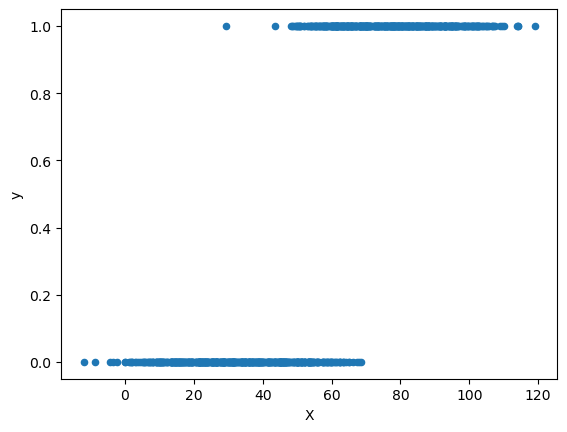

In [3]:
df.plot.scatter(x='X', y='y')

## Fit Logistic Regression Model

In [4]:
from sklearn.model_selection import train_test_split
X = df['X']
y = df['y']
#I was getting an incompatible shape error on the X_train and y_train data. I had to reshape the features and target
X = df['X'].values.reshape(-1, 1)
y = df['y'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [6]:
y_pred = log_reg.predict(X_test)

## Evaluate the perfomance of the model

In [7]:

c_matrix = confusion_matrix(y_test, log_reg.predict(X_test))
c_matrix

array([[96,  7],
       [ 9, 88]], dtype=int64)

In [8]:
TP = c_matrix[1,1]
TN = c_matrix[0,0]
FP = c_matrix[0,1]
FN = c_matrix[1,0]


accuracy = (TP + TN) / (TP + TN + FP + FN)

print("The accuracy of the model is:", accuracy)

The accuracy of the model is: 0.92


In [9]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9143    0.9320    0.9231       103
           1     0.9263    0.9072    0.9167        97

    accuracy                         0.9200       200
   macro avg     0.9203    0.9196    0.9199       200
weighted avg     0.9201    0.9200    0.9200       200



## Conclusion
The logistic regression model performed very well with an accuracy of 0.92. This is a model that is close to being perfect. 

# Week 4 a fitting the MLP Classifier

First we have to normalize the data. Neural networks are very sensitive to scaling used and therefore we need to standardize the inputs.

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

In [11]:
mich = MLPClassifier(hidden_layer_sizes=(128,64,32), solver='adam', max_iter=200)
_ = mich.fit(X_train, y_train)

In [12]:
y_pred = mich.predict(X_test)

In [13]:
confusion_matrix(y_test, y_pred)

array([[96,  7],
       [10, 87]], dtype=int64)

In [14]:

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9057    0.9320    0.9187       103
           1     0.9255    0.8969    0.9110        97

    accuracy                         0.9150       200
   macro avg     0.9156    0.9145    0.9148       200
weighted avg     0.9153    0.9150    0.9149       200



## Conclusion and Discussion

From the results, it can be observed that the previously used Logistic Regression model performed slightly better compared to the MLP classifier. The Logistic Regression model exhibited weighted average precision, recall, and F1-score values above 0.92, whereas the MLP classifier achieved all three metrics at 0.91. Analyzing the confusion matrix and considering the narrow margin between the two models, it is evident that the MLP classifier made one error more in its prediction compared to the logistic regression model.